## 1. Soru

One hot encoding modelin görmediği veriye nasıl uygulanır?

OneHotEncoder kullandığımızda bilinmeyen kategoriyi handle_unknown parametresini ignore yaparak one-hot encoded kolonları bu özellik için hepsi 0 olur. 

`
from sklearn.preprocessing import OneHotEncoder
 enc = OneHotEncoder(handle_unknown='ignore')
`

Daha sonrasında,

`
reset_index(drop=True, inplace=True)
`

ile indeks resetleme işlemi yapılarak kolon birleştirme işlemi gerçekleştirilir. Böylece OneHotEncoding modeling görmediği veriye uygulanmış olur.

## 2. Soru

Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

Bir özniteliğe ait kategorik sınıflar 0,1,2,3... gibi sayısal değerler ile ifade edilir. Örneğin insured_sex değişkeninde FEMALE ve MALE sınıflarını nümerik değerlere(0,1) çevirebiliriz. Ancak insured_occupation gibi sıralanamayan bir değişken için LabelEncoding kullanılarak bir ölçeklendirme yapılamaz. LabelEncoding daha çok aralarında sayısal bir sıralama ilişkisi bulunan sınıflar (yüksek,orta,düşük vb.) olması durumunda tercih edilir. LabelEncoding ile yaşanan algoritmaların snıflarının sayısal büyüklüklerine göre ilişkilendirilmesi sorununa,one-hot encoding dönüşümü ile çözüm bulunabilir.

In [378]:
#Örnek

data=[['Female','Blue'], ['Male', 'Yellow'],['Male', 'Red'],['Female', 'Pink'], ['Male', 'Blue'], ['Female', 'Black']]
columns=['Sex', 'Favorite_Colour']
dataset=pd.DataFrame(data=data, columns=columns)

le=LabelEncoder()
dataset["Sex_L_enc"]=le.fit_transform(dataset["Sex"])

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(dataset[['Favorite_Colour']]).toarray())
dataset = dataset.join(enc_df)

dataset

,Sex,Favorite_Colour,Sex_L_enc,0,1,2,3,4
0,Female,Blue,0,0.0,1.0,0.0,0.0,0.0
1,Male,Yellow,1,0.0,0.0,0.0,0.0,1.0
2,Male,Red,1,0.0,0.0,0.0,1.0,0.0
3,Female,Pink,0,0.0,0.0,1.0,0.0,0.0
4,Male,Blue,1,0.0,1.0,0.0,0.0,0.0
5,Female,Black,0,1.0,0.0,0.0,0.0,0.0


## 3. Soru

Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

Dengesiz veri kümelerini, eğitim veri kümesi (training dataset) ve test veri kümesi (test dataset) olarak ikiye ayırırken, verilerin dengesizlik oranında, eğitim ve test kümelerine eşit dağılması gerekir. Yani her iki kümede sınıfların oranının aynı olması, modelin performansının istikrarlı (consistency) olması açısından önemlidir.

Dolayısıyla, veri kümesini eğitim ve test veri kümelerine ayırırken, train_test_split() fonksiyonundaki “stratify” parametresiyle, çapraz doğrulama skorunu (cross-validation score) hesaplarken ve hiper parametreleri (hyper-parameters) GridSearchCV veya RandomizedSearchCV ile belirlerken katmanlama durumu dikkate almamız gerekir.

Resampling yaparak, dengesiz veri kümelerini daha dengeli hale getirebiliriz. Bunu yapmak için ilk yöntem azınlık sınıfına (Sınıf-1) ait verileri çeşitli yöntemlerle arttırarak eşit sayıda veriye sahip sınıflar elde etmektir (oversampling). Diğer yöntem ise ağırlıklı sınıfa (Sınıf-0) ait verileri veri kümesinden çıkararak dengeli bir veri kümesi elde etmektir (undersampling).

Bunlarla birlikte oversampling ve undersampling kombinasyonu olan SMOTEENN ve SMOTETomek teknikleriyle de denge sağlanabilir.






## 4. Soru

Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?

Validation bölümü train veri seti içinden seçilir. Train veri seti üzerinde doğru model seçimi yapılarak algoritma belirlenir. Validation bölümünde ise uygulanan model iyileştirilmeye çalışılır. Bunun için hiper parametrik (hyperparameter tuning) uygulamalar denenerek en optimum katsayılar/ağırlıklar bulunmaya çalışılır. Özellikle çok büyük veri setleri üzerinde sürekli train datası üzerinden çalışılamayacağı için küçük bir bölüm alınarak validation olarak tanımlanır.


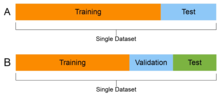

## 5. Soru

predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?

Sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıkları elde etmek istendğinde predict_proba fonksiyonunu kullanmak gerekir. Örneğin bir karar ağacı oluşturuldu ve oluşturulan karar ağacı için olasılıklar öğrenilmek istendiğinde predict_proba metodu kullanılır. Sonuçlar her etikete ait olma yüzdesini içerir.

`
preds = svc.predict(X_val)
`

Aşağıdaki gibi ise treshold değişikliği yapılabilir:

`
threshold = 0.45
`
`
preds = svc.predict_proba(X_val)
preds = (preds[:,1] >= threshold).astype('int')
`

## 6. Soru

Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

In [379]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


#for quick viz
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import random

In [380]:
df = pd.read_csv('auto_insurance_csv.csv')
df = df.drop(['_c39','Unnamed: 0'], axis = 1)
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df1 = df[required_columns]

In [381]:
df1

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2015-01-25,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,2015-01-21,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,2015-02-22,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,2015-01-10,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,2015-02-17,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-02-22,OH,MISSING,0.0,431289,FEMALE,Masters,craft-repair,other,unmarried,...,Honda,Accord,2006,0,8622,False,36-40,0-50,medium,501-1000
996,2015-01-24,IL,MISSING,9999,608177,FEMALE,PhD,prof-specialty,other,wife,...,Volkswagen,Passat,2015,0,384,False,41-45,251-300,medium,501-1000
997,2015-01-23,OH,250/500,other,442797,FEMALE,Masters,armed-forces,other,other-relative,...,Suburu,Impreza,1996,0,4358,False,9999,101-150,medium,0-500
998,2015-02-26,IL,500/1000,9999,441714,MALE,Associate,handlers-cleaners,other,wife,...,Audi,A5,1998,0,1196,False,61-65,451-500,medium,1501-2000


In [382]:
df1.incident_date.count() #incident_date sayısı

1000

In [383]:
# verilerin 200'e 800 olarak validation ve train dataseti olarak ayrılması
df1_val = df1.sort_values(by='incident_date',ascending=False).head(200) 
df2 = df1.sort_values(by='incident_date',ascending=False).tail(800)

In [384]:
#incident_date'e göre sıralanması
df1.sort_values(by='incident_date',ascending=False) 

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
752,2015-03-01,IL,MISSING,0.0,441533,MALE,PhD,machine-op-inspct,other,unmarried,...,Chevrolet,Tahoe,1997,0,5718,False,9999,401-450,low,0-500
74,2015-03-01,IL,MISSING,0.0,472895,FEMALE,Associate,sales,other,wife,...,BMW,X6,2005,0,3972,False,36-40,201-250,medium,501-1000
914,2015-03-01,OH,MISSING,0.0,436364,FEMALE,JD,transport-moving,cross-fit,own-child,...,Honda,Accord,1998,0,5343,False,36-40,101-150,low,1501-2000
883,2015-03-01,OH,MISSING,0.0,479824,FEMALE,Associate,exec-managerial,other,not-in-family,...,Audi,A5,2005,1,3374,False,31-35,101-150,medium,501-1000
839,2015-03-01,OH,MISSING,0.0,448294,MALE,Associate,protective-serv,other,own-child,...,Dodge,Neon,2011,0,9106,False,41-45,201-250,medium,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,2015-01-01,IN,MISSING,0.0,472814,FEMALE,JD,machine-op-inspct,other,other-relative,...,Ford,F150,2011,0,8397,False,26-30,101-150,high,0-500
457,2015-01-01,IL,100/300,0.0,470559,MALE,Masters,transport-moving,other,own-child,...,Volkswagen,Passat,2011,1,759,False,26-30,101-150,high,1501-2000
478,2015-01-01,IL,500/1000,9999,477260,MALE,Masters,armed-forces,chess,unmarried,...,Mercedes,C300,2001,1,6130,False,51-55,401-450,low,1501-2000
41,2015-01-01,IN,250/500,0.0,470577,MALE,Associate,transport-moving,chess,unmarried,...,BMW,X5,2001,1,854,False,9999,101-150,high,0-500


In [385]:
#incident_date kolonunun kaldırılması
df1_val = df1_val.drop(["incident_date"],axis=1)
df2 = df2.drop(["incident_date"],axis=1)

In [386]:
#incident_location kolonunun kaldırılması
df1_val = df1_val.drop(["incident_location"],axis=1)
df2 = df2.drop(["incident_location"],axis=1)

In [387]:
#insured_zip kolonunun kaldırılması
df1_val = df1_val.drop(["insured_zip"],axis=1)
df2 = df2.drop(["insured_zip"],axis=1)

In [388]:
le=LabelEncoder()

In [389]:
le.fit_transform(df2["insured_sex"])

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [390]:
#insured_sex kolonu için labelencoding işlemi
df2["insured_sex"]=le.fit_transform(df2["insured_sex"])

In [391]:
df2["insured_sex"].value_counts()

0    428
1    372
Name: insured_sex, dtype: int64

In [392]:
#location_check kolonu için labelencoding işlemi
df2["location_check"]=le.fit_transform(df2["location_check"])

In [393]:
df2

,policy_state,policy_csl,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
511,OH,MISSING,0.0,0,JD,sales,other,husband,0,-46200,...,Volkswagen,Jetta,2003,0,4427,0,46-50,251-300,medium,501-1000
894,IN,MISSING,0.0,1,MD,priv-house-serv,other,not-in-family,0,0,...,Suburu,Impreza,2000,0,8921,0,31-35,0-50,medium,0-500
125,IN,MISSING,other,1,JD,craft-repair,other,unmarried,47200,-69700,...,Ford,Escape,2013,0,205,0,36-40,201-250,medium,501-1000
895,IL,MISSING,0.0,1,High School,armed-forces,other,own-child,26500,0,...,Saab,92x,1998,1,1980,0,36-40,151-200,medium,0-500
485,IN,MISSING,0.0,1,Associate,adm-clerical,other,husband,0,-31700,...,Nissan,Maxima,1995,0,7692,0,26-30,51-100,medium,1501-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,IN,MISSING,0.0,0,JD,machine-op-inspct,other,other-relative,0,0,...,Ford,F150,2011,0,8397,0,26-30,101-150,high,0-500
457,IL,100/300,0.0,1,Masters,transport-moving,other,own-child,38000,-41200,...,Volkswagen,Passat,2011,1,759,0,26-30,101-150,high,1501-2000
478,IL,500/1000,9999,1,Masters,armed-forces,chess,unmarried,0,0,...,Mercedes,C300,2001,1,6130,0,51-55,401-450,low,1501-2000
41,IN,250/500,0.0,1,Associate,transport-moving,chess,unmarried,0,-24100,...,BMW,X5,2001,1,854,0,9999,101-150,high,0-500


In [394]:
#insured_education_level kolonu için ordinalencoding işlemi
insured_education_level_o={"High School":1, "College":2, "Associate":3, "Masters":4, "JD":5, "MD":5, "PhD":5}

In [395]:
df2["insured_education_level"]=df2["insured_education_level"].map(insured_education_level_o)

In [396]:
df2["insured_education_level"].value_counts()

5    356
1    132
3    115
4    109
2     88
Name: insured_education_level, dtype: int64

In [397]:
#incident_severity kolonu için ordinalencoding işlemi
incident_severity_o={"Trivial Damage":1, "Minor Damage":2, "Major Damage":3, "Total Loss":4}

In [398]:
df2["incident_severity"]=df2["incident_severity"].map(incident_severity_o)

In [399]:
df2["incident_severity"].value_counts()

2    283
3    224
4    222
1     71
Name: incident_severity, dtype: int64

In [400]:
#policy_csl kolonu için ordinalencoding işlemi
policy_csl_o={"MISSING":0, "100/300":1, "250/500":2, "500/1000":3}

In [401]:
df2["policy_csl"]=df2["policy_csl"].map(policy_csl_o)

In [402]:
df2["policy_csl"].value_counts()

0    693
1     39
2     36
3     32
Name: policy_csl, dtype: int64

In [403]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df2[col] = df2[col].astype('object')

#burada encoding işlemi yapılan kolonlar eklenmiyor
label_columns=['insured_sex', 'location_check']
order_columns=['insured_education_level', 'incident_severity', 'policy_csl']
columns_to_encode = []
for col in df2.columns:
  if df2[col].dtype == 'object' and col not in label_columns and col not in order_columns:
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'umbrella_limit',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [404]:
#onehotencoding işlemi
df_ohe = pd.get_dummies(df2, columns = columns_to_encode)
cl=[]
for _ in df_ohe.columns:
    cl.append(_)
cl

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'capital-gains',
 'capital-loss',
 'incident_severity',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'auto_year',
 'fraud_reported',
 'claim_day_of_policy',
 'location_check',
 'policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'umbrella_limit_0.0',
 'umbrella_limit_9999',
 'umbrella_limit_other',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 'insured_occupation_transport-moving',
 'insured_hobbies_chess',
 'insu

In [405]:
#kategorik olanlar ayrılıyor
df_10 = df_ohe.iloc[:,:15]
cl1= cl[15:]
cl1

['policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'umbrella_limit_0.0',
 'umbrella_limit_9999',
 'umbrella_limit_other',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 'insured_occupation_transport-moving',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_hobbies_other',
 'insured_relationship_husband',
 'insured_relationship_not-in-family',
 'insured_relationship_other-relative',
 'insured_relationship_own-child',
 'insured_relationship_unmarried',
 'insured_relationship_wife',
 'incident_type_Multi-vehicle Collision',
 'inci

In [406]:
df_10.head(20)

,policy_csl,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,claim_day_of_policy,location_check
511,0,0,5,0,-46200,1,9,1,2,3,6560,2003,0,4427,0
894,0,1,5,0,0,2,6,1,1,3,6000,2000,0,8921,0
125,0,1,5,47200,-69700,4,12,3,2,3,36300,2013,0,205,0
895,0,1,1,26500,0,3,23,3,0,3,55200,1998,1,1980,0
485,0,1,3,0,-31700,4,0,1,2,1,48290,1995,0,7692,0
398,0,0,1,0,-47400,1,7,1,0,1,3190,2015,0,8231,0
295,0,0,3,0,-54600,4,13,1,1,2,72120,2009,0,3483,0
542,0,0,5,0,0,3,21,3,1,3,48070,2014,0,2591,0
285,0,0,1,0,-40900,4,8,1,0,1,70290,2008,0,6798,0
858,0,0,2,0,0,2,17,3,2,3,42500,2000,0,5385,0


In [407]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
df3=ohe.fit_transform(df2[columns_to_encode]).toarray()

In [408]:
df_10.reset_index(drop=True, inplace=True)

In [409]:
df4=pd.DataFrame(df3, columns=cl1)
df5 = pd.concat([df_10,df4], axis=1)
df5.head(14)

,policy_csl,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,0,0,5,0,-46200,1,9,1,2,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,1,5,0,0,2,6,1,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,1,5,47200,-69700,4,12,3,2,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,1,1,26500,0,3,23,3,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,1,3,0,-31700,4,0,1,2,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0,0,1,0,-47400,1,7,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0,0,3,0,-54600,4,13,1,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0,0,5,0,0,3,21,3,1,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0,0,1,0,-40900,4,8,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0,0,2,0,0,2,17,3,2,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [410]:
features = []
for col in df5.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = df5[features]
y = df5[target]

In [411]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [412]:
X

array([[-0.3582028 , -0.93228691,  0.92369197, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.3582028 ,  1.07263117,  0.92369197, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [-0.3582028 ,  1.07263117,  0.92369197, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [ 3.7948731 ,  1.07263117,  0.27032895, ..., -0.71374643,
         1.47893576, -0.73178456],
       [ 2.41051447,  1.07263117, -0.38303407, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [-0.3582028 , -0.93228691,  0.92369197, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

In [413]:
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

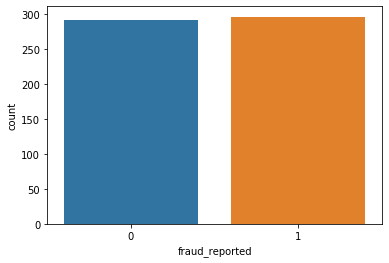

In [414]:
chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])

92.06349206349206

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       128
           1       0.98      0.85      0.91       124

    accuracy                           0.92       252
   macro avg       0.93      0.92      0.92       252
weighted avg       0.93      0.92      0.92       252



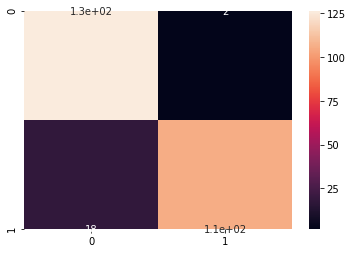

In [415]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [416]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [300, 650, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 17, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 650, 1000]},
                   random_state=42, verbose=2)

In [417]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

92.85714285714286

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       128
           1       0.95      0.90      0.93       124

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252



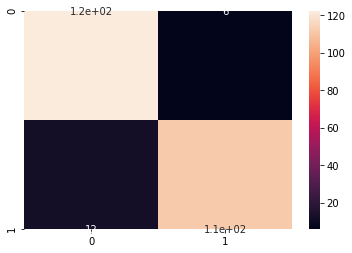

In [418]:
rf2 = RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=2,max_features='auto'
                            ,max_depth=5,bootstrap='False')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [419]:
#training kısmında yapıldığı gibi aynı encoding işlemlerinin burada da yapılması
le=LabelEncoder()
df1_val["insured_sex"]=le.fit_transform(df1_val["insured_sex"])

In [420]:
df1_val["location_check"]=le.fit_transform(df1_val["location_check"])

In [421]:
insured_education_level_o={"High School":1, "College":2, "Associate":3, "Masters":4, "JD":5, "MD":5, "PhD":5}
df1_val["insured_education_level"]=df1_val["insured_education_level"].map(insured_education_level_o)

In [422]:
incident_severity_o={"Trivial Damage":1, "Minor Damage":2, "Major Damage":3, "Total Loss":4}
df1_val["incident_severity"]=df1_val["incident_severity"].map(incident_severity_o)

In [423]:
policy_csl_o={"MISSING":0, "100/300":1, "250/500":2, "500/1000":3}
df1_val["policy_csl"]=df1_val["policy_csl"].map(policy_csl_o)

In [424]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df1_val[col] = df1_val[col].astype('object')

#encoding işlemi yapılan kolonların ayrılması
label_columns=['insured_sex', 'location_check']
order_columns=['insured_education_level', 'incident_severity', 'policy_csl']
columns_to_encode = []
for col in df1_val.columns:
  if df1_val[col].dtype == 'object' and col not in label_columns and col not in order_columns :
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'umbrella_limit',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [425]:
df2_val = pd.DataFrame(ohe.transform(df1_val[columns_to_encode]).toarray(), columns=cl1)

In [426]:
df2_val.head()

,policy_state_IL,policy_state_IN,policy_state_OH,umbrella_limit_0.0,umbrella_limit_9999,umbrella_limit_other,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [427]:
# Sayısal kolonlar
cl0 = cl[:15] 
df_val_num = pd.DataFrame(df1_val, columns=cl0)

In [428]:
df_val_num.reset_index(drop=True, inplace=True)

In [429]:
df3_val = pd.concat([df_val_num,df2_val], axis=1)
df3_val.head()

,policy_csl,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,0,1,5,57100,0,2,2,4,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,3,0,0,2,18,3,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,5,0,-67000,3,2,4,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,3,0,0,3,18,3,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1,3,0,-48800,3,4,1,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [430]:
features = []
for col in df3_val.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X_val = df3_val[features]
y_val = df3_val[target]

In [431]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [432]:
X

array([[-0.3582028 , -0.93228691,  0.92369197, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.3582028 ,  1.07263117,  0.92369197, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [-0.3582028 ,  1.07263117,  0.92369197, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [ 3.7948731 ,  1.07263117,  0.27032895, ..., -0.71374643,
         1.47893576, -0.73178456],
       [ 2.41051447,  1.07263117, -0.38303407, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [-0.3582028 , -0.93228691,  0.92369197, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

In [475]:
#modellerin karşılaştırılması (threshold uygulanarak ve değiştirerek)

24.0

              precision    recall  f1-score   support

           0       0.92      0.53      0.67       163
           1       0.28      0.78      0.41        37

    accuracy                           0.58       200
   macro avg       0.60      0.66      0.54       200
weighted avg       0.80      0.58      0.63       200



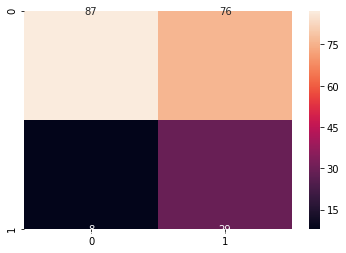

In [433]:
preds = rf2.predict(X_val)
score = rf2.score(X_val, y_val)


threshold = 0.65

preds = rf2.predict_proba(X_val)
preds = (preds[:,1] >= threshold).astype('int')
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

24.0

              precision    recall  f1-score   support

           0       0.88      0.33      0.48       163
           1       0.21      0.81      0.34        37

    accuracy                           0.41       200
   macro avg       0.55      0.57      0.41       200
weighted avg       0.76      0.41      0.45       200



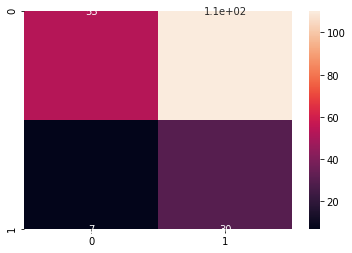

In [434]:
preds = rf2.predict(X_val)
score = rf2.score(X_val, y_val)


threshold = 0.6

preds = rf2.predict_proba(X_val)
preds = (preds[:,1] >= threshold).astype('int')
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

Score: 0.63
              precision    recall  f1-score   support

           0       0.84      0.61      0.70       163
           1       0.22      0.49      0.30        37

    accuracy                           0.58       200
   macro avg       0.53      0.55      0.50       200
weighted avg       0.72      0.59      0.63       200



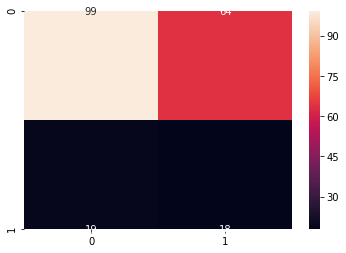

In [435]:
svc = SVC(kernel='linear',probability=True, random_state=3)
svc.fit(X_train, y_train)

preds = svc.predict(X_val)
threshold = 0.45

preds = svc.predict_proba(X_val)
preds = (preds[:,1] >= threshold).astype('int')

print('Score:' , svc.score(X_val, y_val))
print(classification_report(y_val, preds))



cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

0.355

              precision    recall  f1-score   support

           0       0.85      0.25      0.39       163
           1       0.20      0.81      0.32        37

    accuracy                           0.36       200
   macro avg       0.53      0.53      0.35       200
weighted avg       0.73      0.35      0.38       200



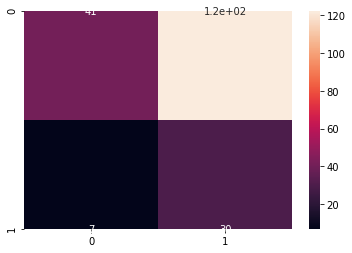

In [474]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
preds = dtc.predict(X_val)

preds = dtc.predict(X_val)
threshold = 0.7

preds = dtc.predict_proba(X_val)
preds = (preds[:,1] >= threshold).astype('int')

score = dtc.score(X_val, y_val)
print(score)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)